In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('mode.chained_assignment', None)

# Import Dataset

In [2]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Checking Duplicate Data

In [4]:
df[df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [5]:
df[df.duplicated(subset='Id')]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [6]:
df = df.drop(['Id'],1)

# Missing Value

## Find Missing Value

In [7]:
count_missing = df.isnull().sum()
missing = count_missing[count_missing>0]

In [8]:
df[missing.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
LotFrontage     1201 non-null float64
Alley           91 non-null object
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
FireplaceQu     770 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
PoolQC          7 non-null object
Fence           281 non-null object
MiscFeature     54 non-null object
dtypes: float64(3), object(16)
memory usage: 216.8+ KB


In [9]:
# 'LotFrontage','MasVnrArea','GarageYrBlt' numeric
# other categoric

In [10]:
missing[missing>1460*0.6]

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [11]:
miss_feature = missing[missing>1460*0.6]
miss_feature = miss_feature.index

## Dropping Feature

In [12]:
df = df.drop(miss_feature,1)
print(df.shape)
df.head()

(1460, 76)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Need to Visualize for Numerical Data

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


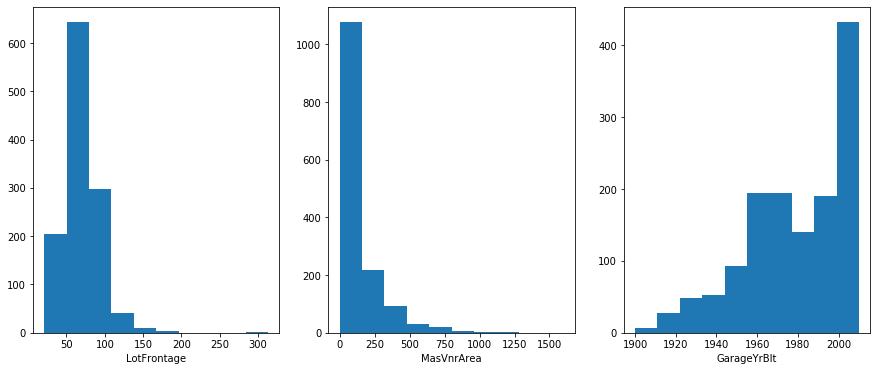

In [13]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.hist(df['LotFrontage'])
plt.xlabel('LotFrontage')

plt.subplot(1,3,2)
plt.hist(df['MasVnrArea'])
plt.xlabel('MasVnrArea')

plt.subplot(1,3,3)
plt.hist(df['GarageYrBlt'])
plt.xlabel('GarageYrBlt')

plt.show()

In [14]:
median = df[['LotFrontage','MasVnrArea','GarageYrBlt' ]].median(axis=0)
df[['LotFrontage','MasVnrArea','GarageYrBlt']]=df[['LotFrontage','MasVnrArea','GarageYrBlt' ]].fillna(median,axis=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [15]:
df[['LotFrontage','MasVnrArea','GarageYrBlt']].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

## Fillna with Modus

In [16]:
count_missing = df.isnull().sum()
missing = count_missing[count_missing>0]

In [17]:
miss_cat = missing[~missing.index.isin(['LotFrontage','MasVnrArea','GarageYrBlt'])]

In [18]:
mode = df[miss_cat.index].mode(axis=0)
mode = mode.loc[0]
df[miss_cat.index]=df[miss_cat.index].fillna(mode,axis=0)

# Outliers

## Find Outliers

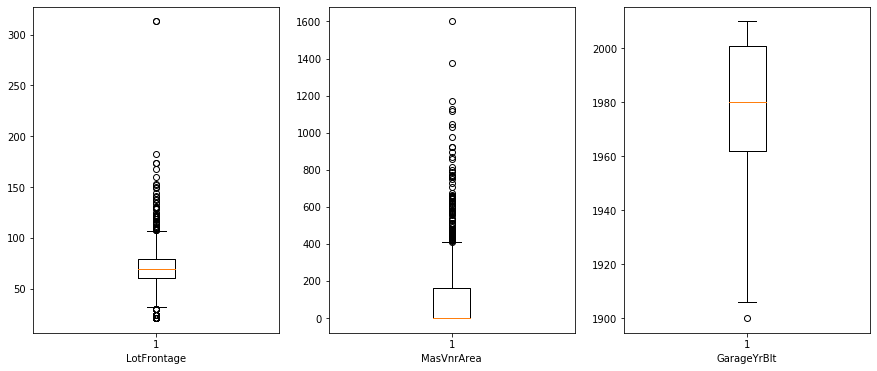

In [19]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.boxplot(df['LotFrontage'])
plt.xlabel('LotFrontage')

plt.subplot(1,3,2)
plt.boxplot(df['MasVnrArea'])
plt.xlabel('MasVnrArea')

plt.subplot(1,3,3)
plt.boxplot(df['GarageYrBlt'])
plt.xlabel('GarageYrBlt')

plt.show()

In [20]:
## IQR Method
q1 = df['LotFrontage'].quantile(0.25)
q3 = df['LotFrontage'].quantile(0.75)

iqr = q3-q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

In [21]:
outliers = df[(df['LotFrontage']>upper_bound)|(df['LotFrontage']<lower_bound)]
print(len(outliers['LotFrontage']))
outliers['LotFrontage'].head()

106


25    110.0
35    108.0
36    112.0
41    115.0
52    110.0
Name: LotFrontage, dtype: float64

## Winsorized Method

In [22]:
df.loc[(df['LotFrontage']>upper_bound),'LotFrontage'] = upper_bound
df.loc[(df['LotFrontage']<lower_bound),'LotFrontage'] = lower_bound

Text(0.5, 0, 'LotFrontage')

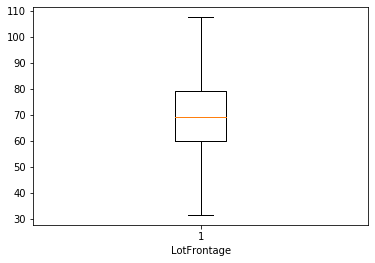

In [23]:
plt.boxplot(df['LotFrontage'])
plt.xlabel('LotFrontage')

## How to Apply to other Columns?

In [24]:
def find_outliers(x):
    if x.dtype == 'O':
        return x
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)

    iqr = q3-q1

    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    outliers = x[(x>upper_bound)|(x<lower_bound)]

    x[(x>upper_bound)] = upper_bound
    x[(x<lower_bound)] = lower_bound
    return x

In [25]:
df = df.apply(find_outliers,axis=0)

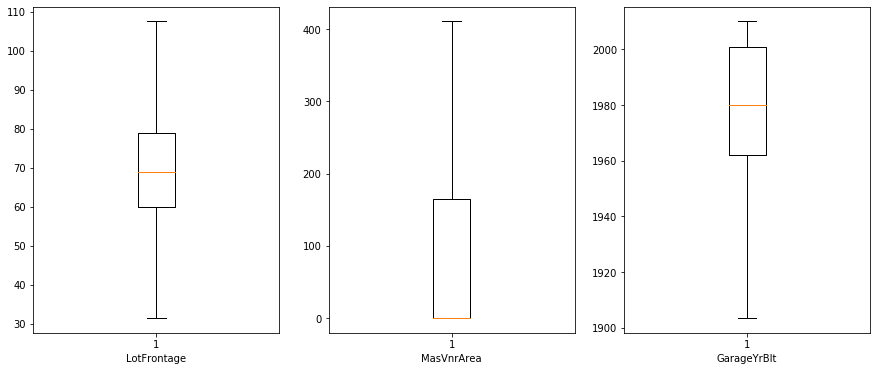

In [26]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.boxplot(df['LotFrontage'])
plt.xlabel('LotFrontage')

plt.subplot(1,3,2)
plt.boxplot(df['MasVnrArea'])
plt.xlabel('MasVnrArea')

plt.subplot(1,3,3)
plt.boxplot(df['GarageYrBlt'])
plt.xlabel('GarageYrBlt')

plt.show()

# Changing Datatypes

## Convert String to Dataframe

In [27]:
import datetime
df['YrSold'].apply(lambda x : datetime.date(x,1,1)).head()

0    2008-01-01
1    2007-01-01
2    2008-01-01
3    2006-01-01
4    2008-01-01
Name: YrSold, dtype: object

# Unique Number of Item each Column

In [28]:
df.select_dtypes('O').isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

## One Hot Encoder

In [29]:
df_object = df.select_dtypes('O')
df_numeric = df.select_dtypes('number')

In [30]:
from sklearn.preprocessing import OneHotEncoder
scaler = OneHotEncoder()
scaler.fit(df_object)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [31]:
df_dummy = pd.DataFrame(scaler.transform(df_object).toarray(),columns = scaler.get_feature_names())

# Standardization

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_numeric)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
df_standardized = pd.DataFrame(scaler.transform(df_numeric),columns = df_numeric.columns)
df_standardized.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.131067,-0.237456,-0.333244,0.652644,-0.564161,1.053246,0.878668,0.795643,0.614224,0.0,...,-0.787243,0.350520,0.0,0.0,0.0,0.0,0.0,-1.599111,0.138777,0.463935
1,-0.935733,0.633321,-0.013189,-0.073068,2.030907,0.156179,-0.429577,-0.667353,1.242296,0.0,...,1.768105,-0.811747,0.0,0.0,0.0,0.0,0.0,-0.489110,-0.614439,0.062047
2,0.131067,-0.063300,0.446022,0.652644,-0.564161,0.986797,0.830215,0.541858,0.106224,0.0,...,-0.787243,-0.011497,0.0,0.0,0.0,0.0,0.0,0.990891,0.138777,0.687207
3,0.397766,-0.527714,-0.027104,0.652644,-0.564161,-1.870528,-0.720298,-0.667353,-0.517230,0.0,...,-0.787243,-0.144872,0.0,0.0,0.0,0.0,0.0,-1.599111,-1.367655,-0.555671
4,0.131067,0.865528,1.283733,1.378355,-0.564161,0.953572,0.733308,1.945140,0.496460,0.0,...,0.859156,0.788753,0.0,0.0,0.0,0.0,0.0,2.100892,0.138777,1.081653


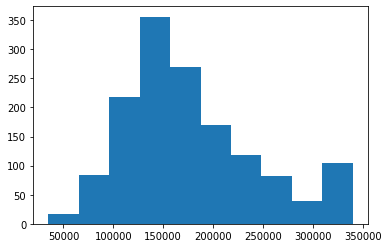

In [34]:
plt.hist(df['SalePrice'])
plt.show()

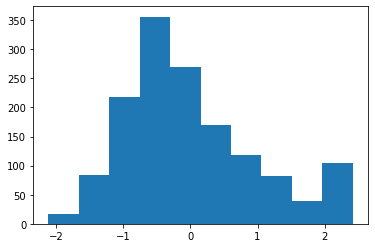

In [35]:
plt.hist(df_standardized['SalePrice'])
plt.show()

# MinMax Transformation

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df_standardized)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [37]:
df_minmax = pd.DataFrame(scaler.transform(df_standardized),columns = df_standardized.columns)
df_minmax.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.32,0.440789,0.430367,0.625,0.375,0.944,0.883333,0.477321,0.396490,0.0,...,0.000000,0.358824,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,0.568924
1,0.00,0.638158,0.501390,0.500,1.000,0.728,0.433333,0.000000,0.549245,0.0,...,0.709524,0.000000,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,0.480439
2,0.32,0.480263,0.603292,0.625,0.375,0.928,0.866667,0.394521,0.272938,0.0,...,0.000000,0.247059,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,0.618082
3,0.40,0.375000,0.498302,0.625,0.375,0.240,0.333333,0.000000,0.121306,0.0,...,0.000000,0.205882,0.0,0.0,0.0,0.0,0.0,0.090909,0.00,0.344435
4,0.32,0.690789,0.789186,0.750,0.375,0.920,0.833333,0.852359,0.367848,0.0,...,0.457143,0.494118,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,0.704928


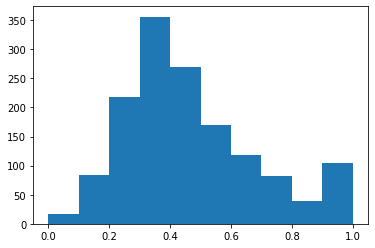

In [38]:
plt.hist(df_minmax['SalePrice'])
plt.show()

# Polynomial Transformation

In [39]:
from sklearn.preprocessing import PolynomialFeatures

scaler = PolynomialFeatures(degree=2,)
scaler.fit(df_minmax)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [40]:
df_poly = pd.DataFrame(scaler.transform(df_minmax),columns = scaler.get_feature_names(df_minmax.columns))
df_poly.head()

,1,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MiscVal^2,MiscVal MoSold,MiscVal YrSold,MiscVal SalePrice,MoSold^2,MoSold YrSold,MoSold SalePrice,YrSold^2,YrSold SalePrice,SalePrice^2
0,1.0,0.32,0.440789,0.430367,0.625,0.375,0.944,0.883333,0.477321,0.396490,...,0.0,0.0,0.0,0.0,0.008264,0.045455,0.051720,0.2500,0.284462,0.323674
1,1.0,0.00,0.638158,0.501390,0.500,1.000,0.728,0.433333,0.000000,0.549245,...,0.0,0.0,0.0,0.0,0.132231,0.090909,0.174705,0.0625,0.120110,0.230822
2,1.0,0.32,0.480263,0.603292,0.625,0.375,0.928,0.866667,0.394521,0.272938,...,0.0,0.0,0.0,0.0,0.528926,0.363636,0.449514,0.2500,0.309041,0.382025
3,1.0,0.40,0.375000,0.498302,0.625,0.375,0.240,0.333333,0.000000,0.121306,...,0.0,0.0,0.0,0.0,0.008264,0.000000,0.031312,0.0000,0.000000,0.118635
4,1.0,0.32,0.690789,0.789186,0.750,0.375,0.920,0.833333,0.852359,0.367848,...,0.0,0.0,0.0,0.0,1.000000,0.500000,0.704928,0.2500,0.352464,0.496924


# Discretization

In [41]:
from sklearn.preprocessing import KBinsDiscretizer

scaler = KBinsDiscretizer(n_bins=3,encode='ordinal')
scaler.fit(df_poly)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:159: UserWarning: Feature 0 is constant and will be replaced with 0.
  "replaced with 0." % jj)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:159: UserWarning: Feature 10 is constant and will be replaced with 0.
  "replaced with 0." % jj)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small

KBinsDiscretizer(encode='ordinal', n_bins=3, strategy='quantile')

In [42]:
df_discretized = pd.DataFrame(scaler.transform(df_poly),columns = df_poly.columns)
df_discretized.head()

,1,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MiscVal^2,MiscVal MoSold,MiscVal YrSold,MiscVal SalePrice,MoSold^2,MoSold YrSold,MoSold SalePrice,YrSold^2,YrSold SalePrice,SalePrice^2
0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
1,0.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0,2.0
3,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0,2.0


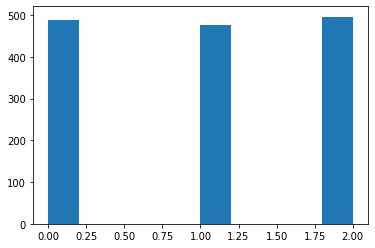

In [43]:
plt.hist(df_discretized['SalePrice'])
plt.show()

# Normalization

In [44]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaler.fit(df_poly)

Normalizer(copy=True, norm='l2')

In [45]:
df_normalized = pd.DataFrame(scaler.transform(df_poly),columns = df_poly.columns)
df_normalized.head()

,1,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MiscVal^2,MiscVal MoSold,MiscVal YrSold,MiscVal SalePrice,MoSold^2,MoSold YrSold,MoSold SalePrice,YrSold^2,YrSold SalePrice,SalePrice^2
0,0.153801,0.049216,0.067794,0.066191,0.096126,0.057676,0.145189,0.135858,0.073413,0.060981,...,0.0,0.0,0.0,0.0,0.001271,0.006991,0.007955,0.038450,0.043751,0.049782
1,0.172694,0.000000,0.110206,0.086587,0.086347,0.172694,0.125721,0.074834,0.000000,0.094851,...,0.0,0.0,0.0,0.0,0.022836,0.015699,0.030171,0.010793,0.020742,0.039862
2,0.145220,0.046470,0.069744,0.087610,0.090763,0.054458,0.134764,0.125857,0.057292,0.039636,...,0.0,0.0,0.0,0.0,0.076811,0.052807,0.065279,0.036305,0.044879,0.055478
3,0.210176,0.084070,0.078816,0.104731,0.131360,0.078816,0.050442,0.070059,0.000000,0.025496,...,0.0,0.0,0.0,0.0,0.001737,0.000000,0.006581,0.000000,0.000000,0.024934
4,0.099311,0.031780,0.068603,0.078375,0.074484,0.037242,0.091366,0.082759,0.084649,0.036532,...,0.0,0.0,0.0,0.0,0.099311,0.049656,0.070007,0.024828,0.035004,0.049350


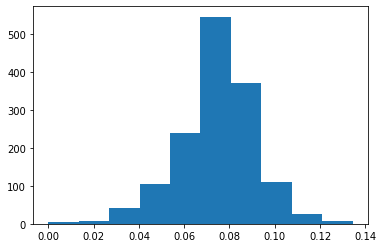

In [46]:
plt.hist(df_normalized['SalePrice'])
plt.show()